# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 

Running this project require the following imports 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [ ]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



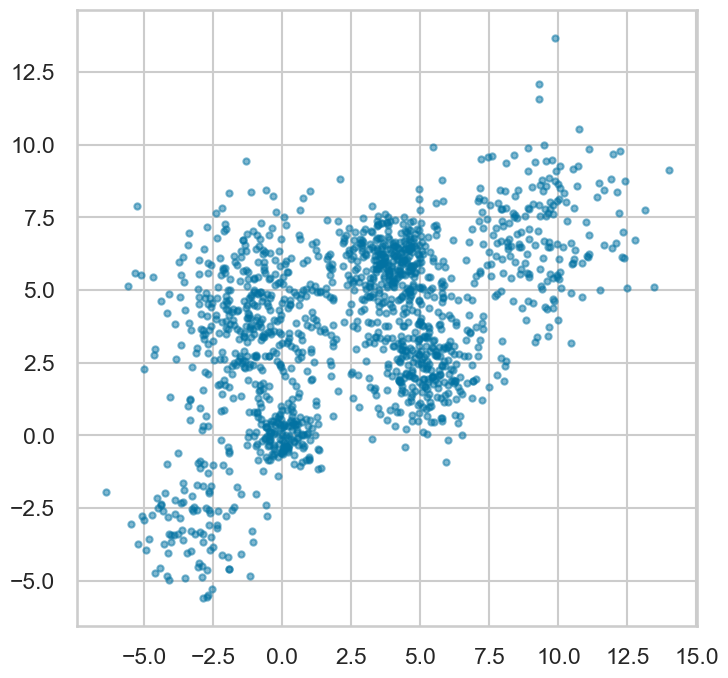

In [157]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

Best K = 6 score= 0.48609408962389006


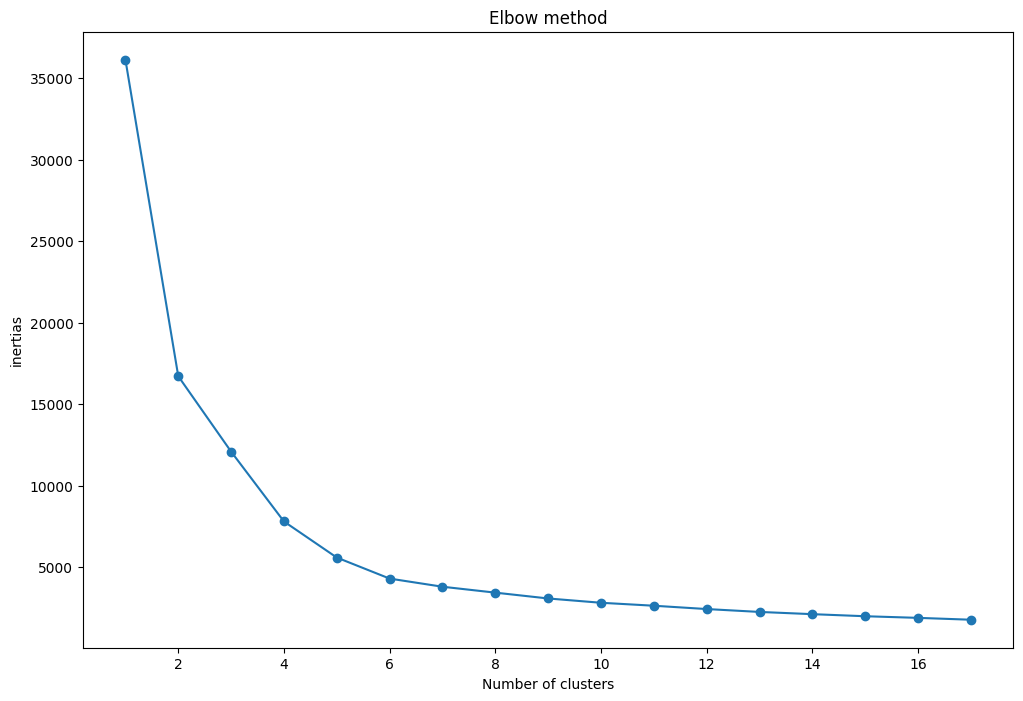

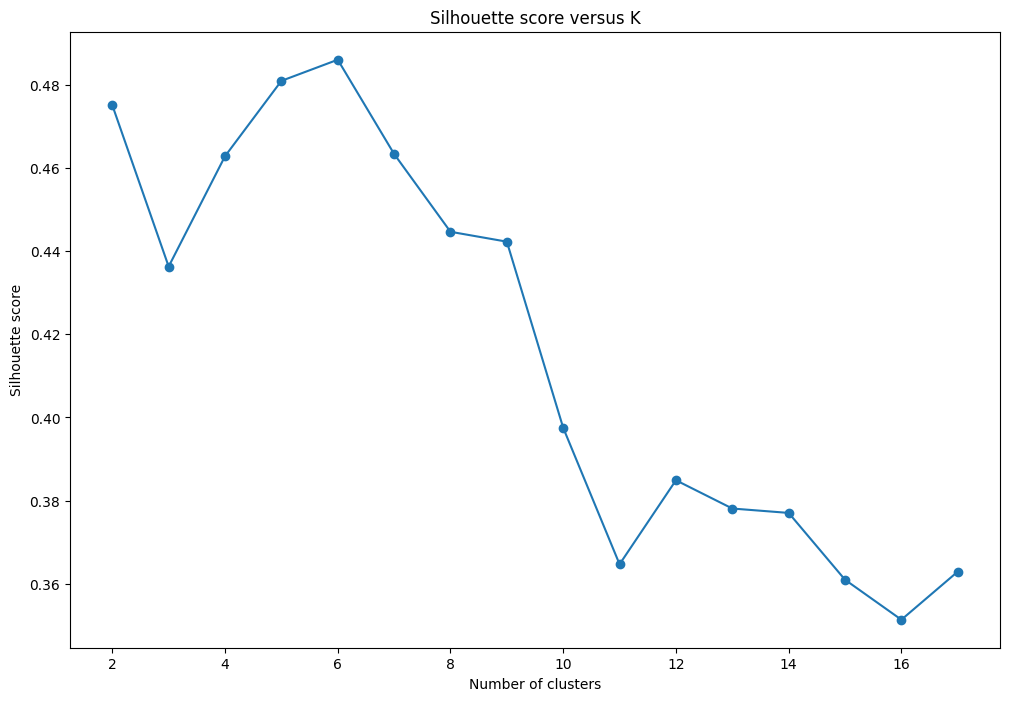

<Figure size 1200x800 with 0 Axes>

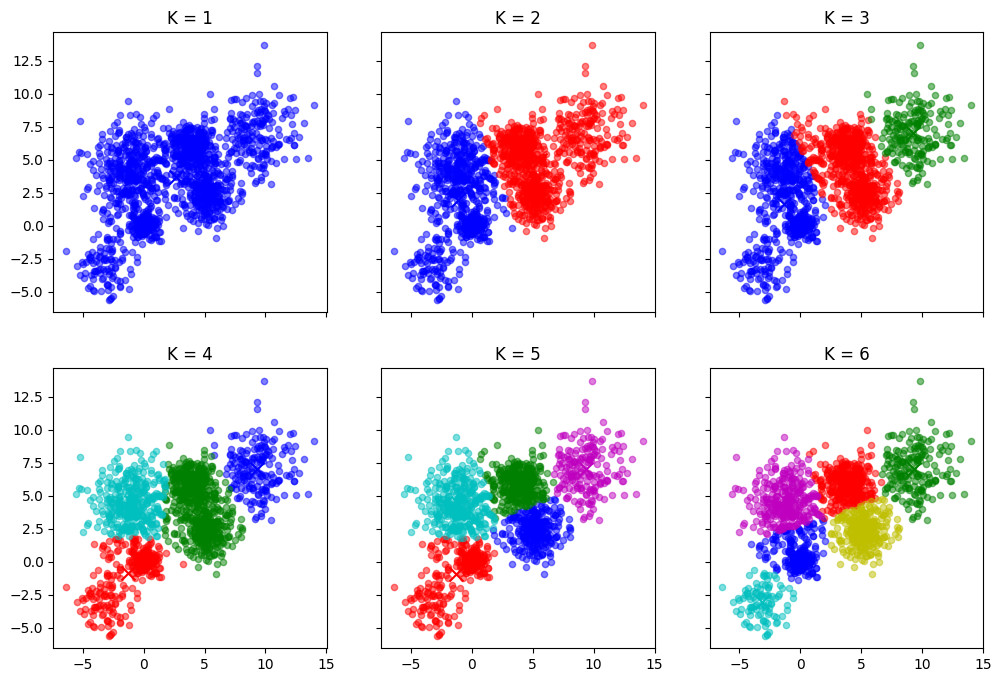

In [16]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
#from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

%matplotlib inline

def display_cluster(axes,k,z,X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            axes[k][z].scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            axes[k][z].scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)
            axes[k][z].title.set_text('K = '+str(i+1))
            plt.rcParams['figure.figsize'] = [12, 8]
            
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)

kmeans=[]
inertias=[]
score=[]

k=0
z=0

for j in range(1,18):
    
    kmeans.append(KMeans(n_clusters=j))
    kmeans[j-1].fit(Multi_blob_Data)
    inertias.append(kmeans[j-1].inertia_)
    if(j>1 and j<18):
        score.append(silhouette_score(Multi_blob_Data, kmeans[j-1].labels_, metric='euclidean'))
        
Best_score=max(score)
K_of_Best_score=2+score.index(Best_score)

plt.figure(1)       
plt.plot(range(1,18), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertias')

plt.figure(2)       
plt.plot(range(2,18), score, marker='o')
plt.title('Silhouette score versus K')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

f = plt.figure(3)    
f, axes = plt.subplots(nrows = 2, ncols = 3, sharex=True, sharey = True)
plt.rcParams['figure.figsize'] = [12, 8]

for j in range(1,7):
    
    display_cluster(axes,k,z,Multi_blob_Data,kmeans[j-1],num_clusters=j)
    
    if j == 3:
        k=k+1
        z=0
    else:
        z=z+1
        

print('Best K = '+str(K_of_Best_score)+' score= '+str(Best_score))

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

cosine average clusters=4 score= 0.7813353497330464


<Figure size 1200x800 with 0 Axes>

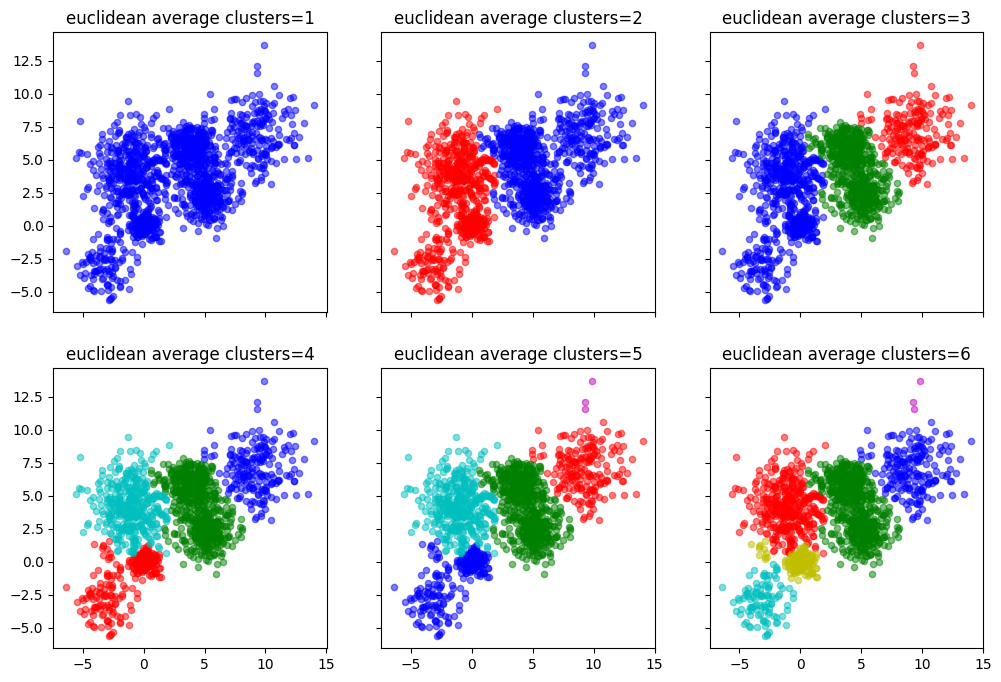

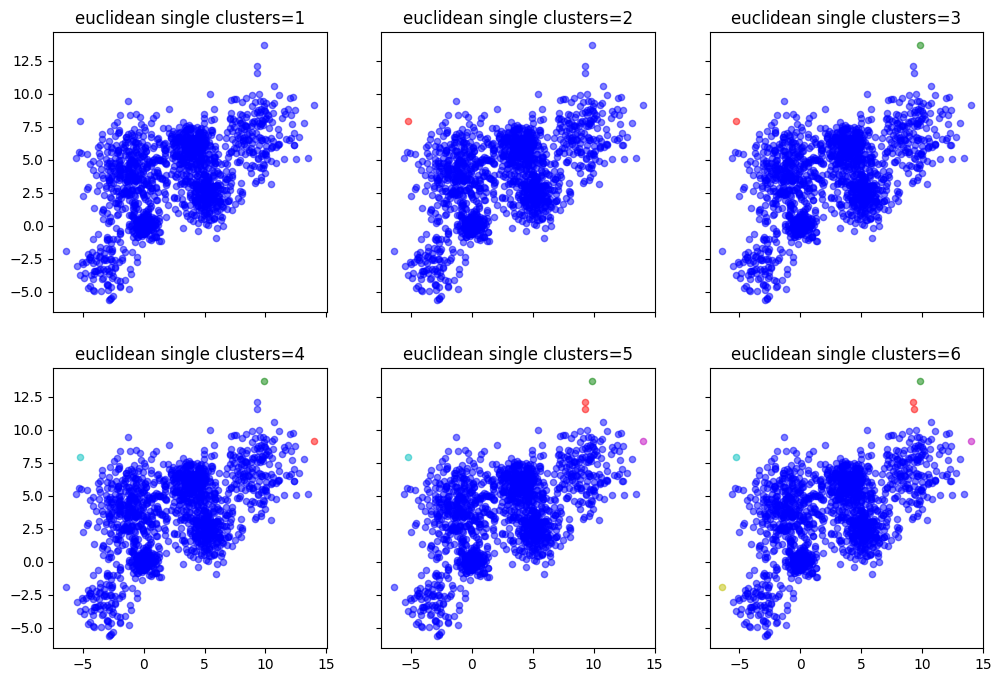

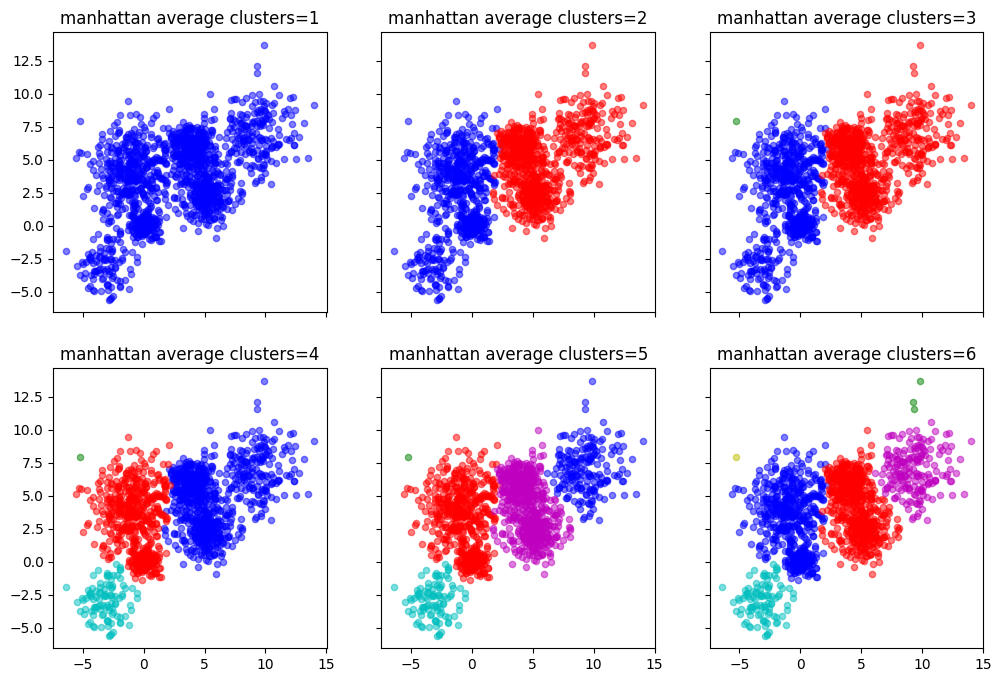

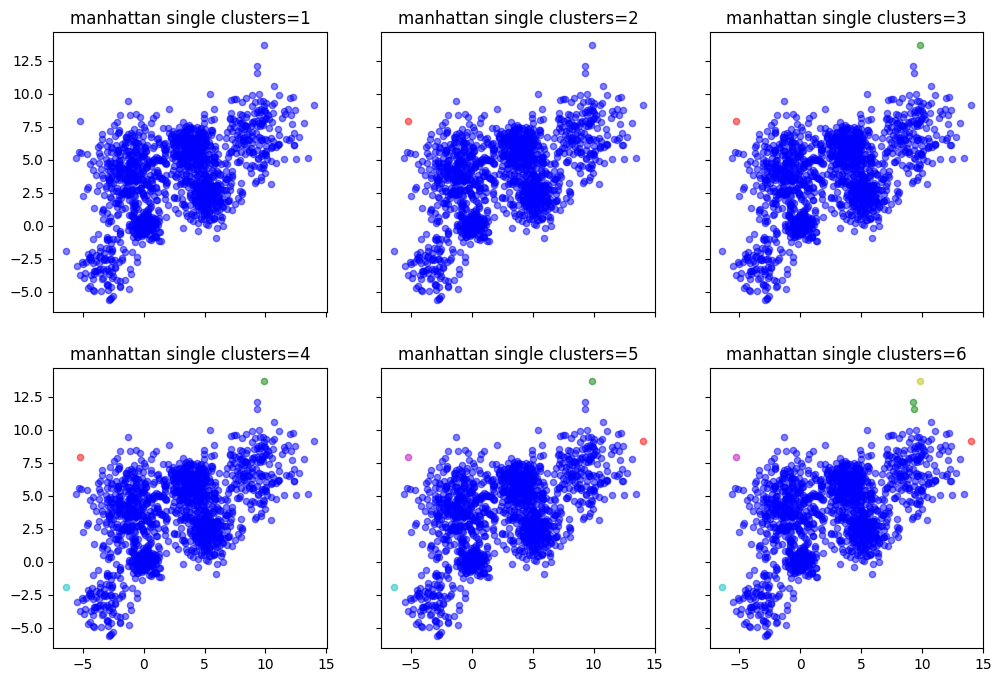

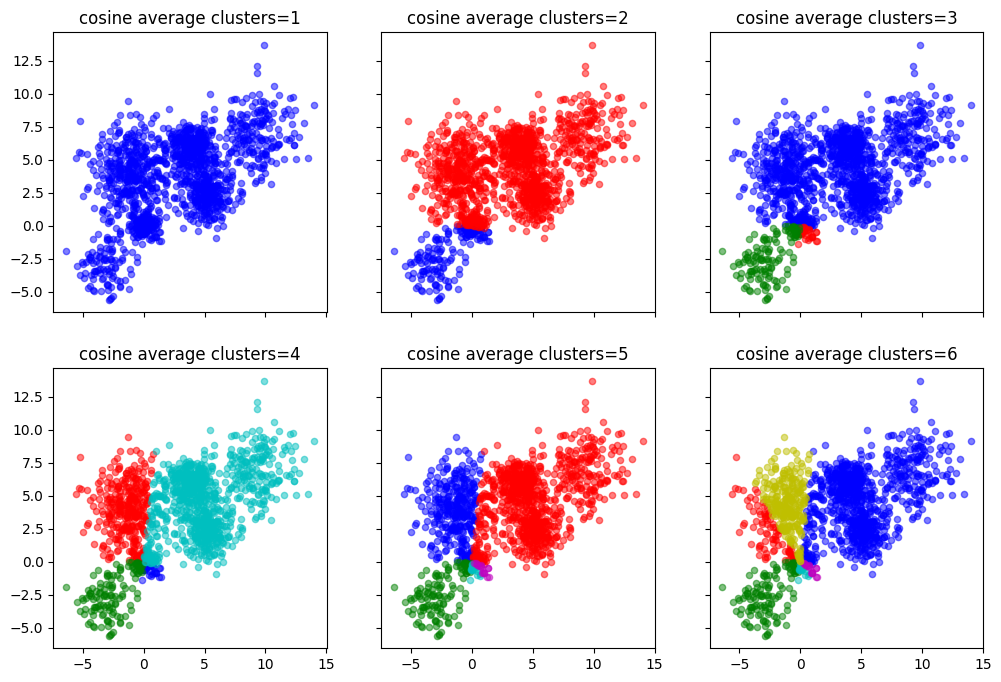

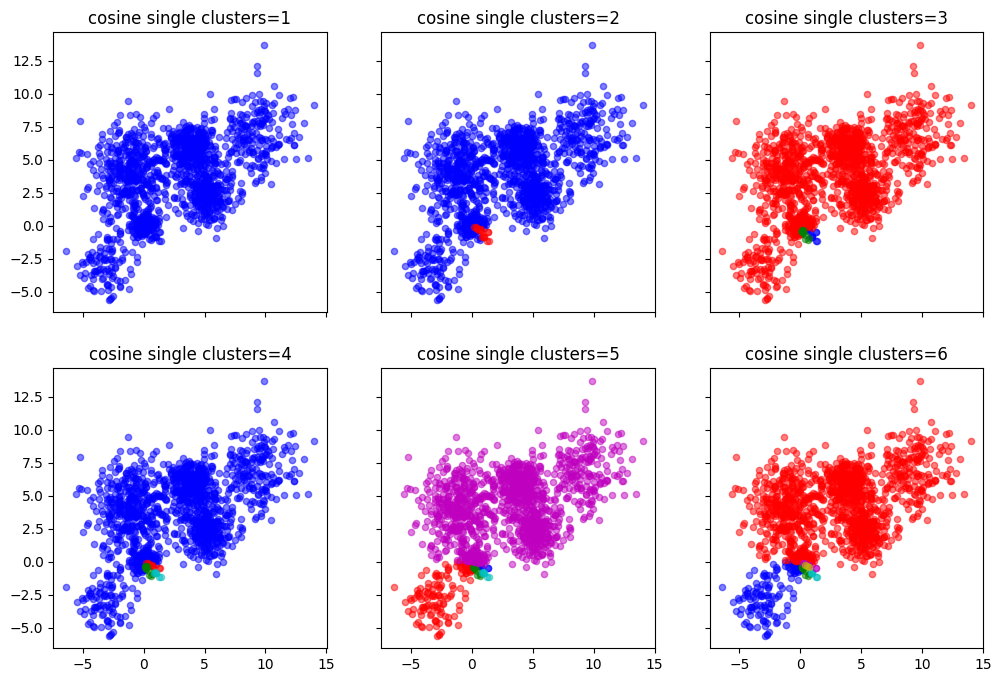

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

from sklearn.datasets import make_blobs

# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(axes,k,z,parameter,X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            axes[k][z].scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            axes[k][z].title.set_text(parameter)
            plt.rcParams['figure.figsize'] = [12, 8]
            
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)

hc=[]
score=[]
parameters=[]
score_parameters=[]
j=0
t=0
for aff in ['euclidean','manhattan','cosine']:
    for link in ['average','single']:
        z=0
        k=0
        j=j+1
        f = plt.figure(j)    
        f, axes = plt.subplots(nrows = 2, ncols = 3, sharex=True, sharey = True)
        for i in range(1,7):
            parameters.append(aff+' '+link+' '+'clusters='+str(i))
            hc.append(AgglomerativeClustering(n_clusters=i,affinity=aff,linkage=link))
            hc[t].fit_predict(Multi_blob_Data)
            display_cluster(axes,k,z,parameters[len(parameters)-1],Multi_blob_Data,hc[t],num_clusters=i)
            
            if(i>1):
                score.append(silhouette_score(Multi_blob_Data, hc[t].labels_, metric=aff))
                score_parameters.append(parameters[len(parameters)-1])
            
            t=t+1
            
            if i == 3:
                k=k+1
                z=0
            else:
                z=z+1
Best_score=max(score)

Best_score_parameter=score_parameters[score.index(Best_score)]
print(Best_score_parameter+' score= '+str(Best_score))

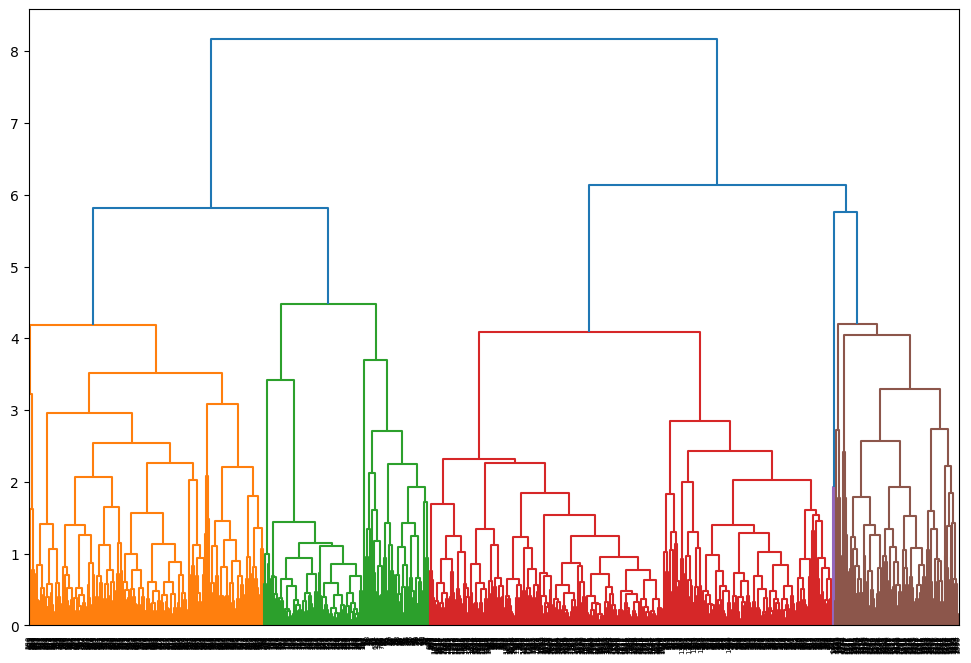

In [6]:
dendrogram_av = shc.dendrogram(shc.linkage( Multi_blob_Data, method='average'))
plt.rcParams['figure.figsize'] = [12, 8]

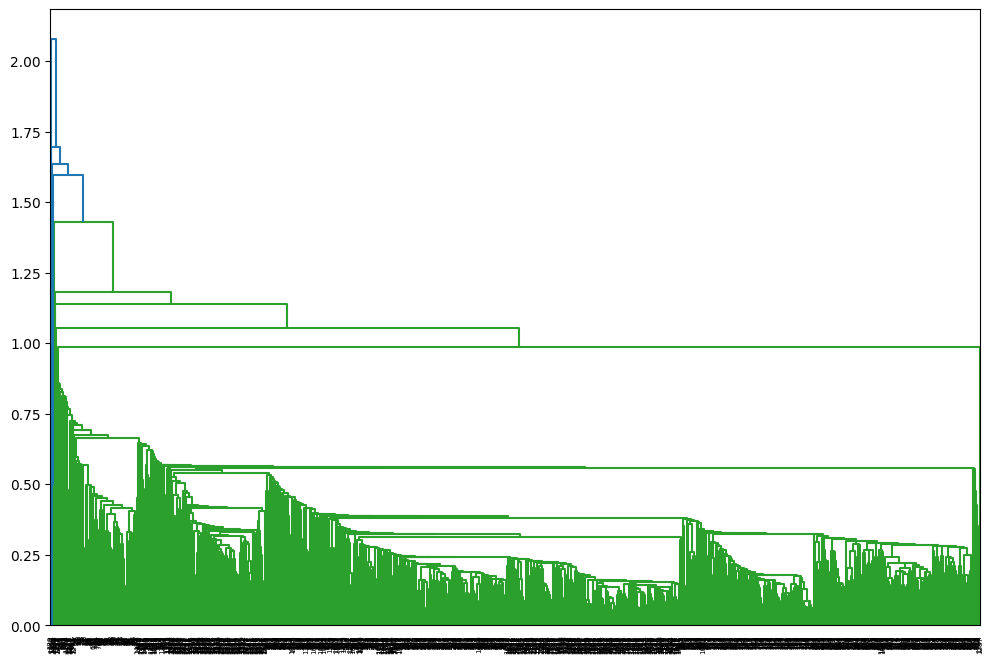

In [7]:
dendrogram_si = shc.dendrogram(shc.linkage( Multi_blob_Data, method='single'))
plt.rcParams['figure.figsize'] = [12, 8]

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

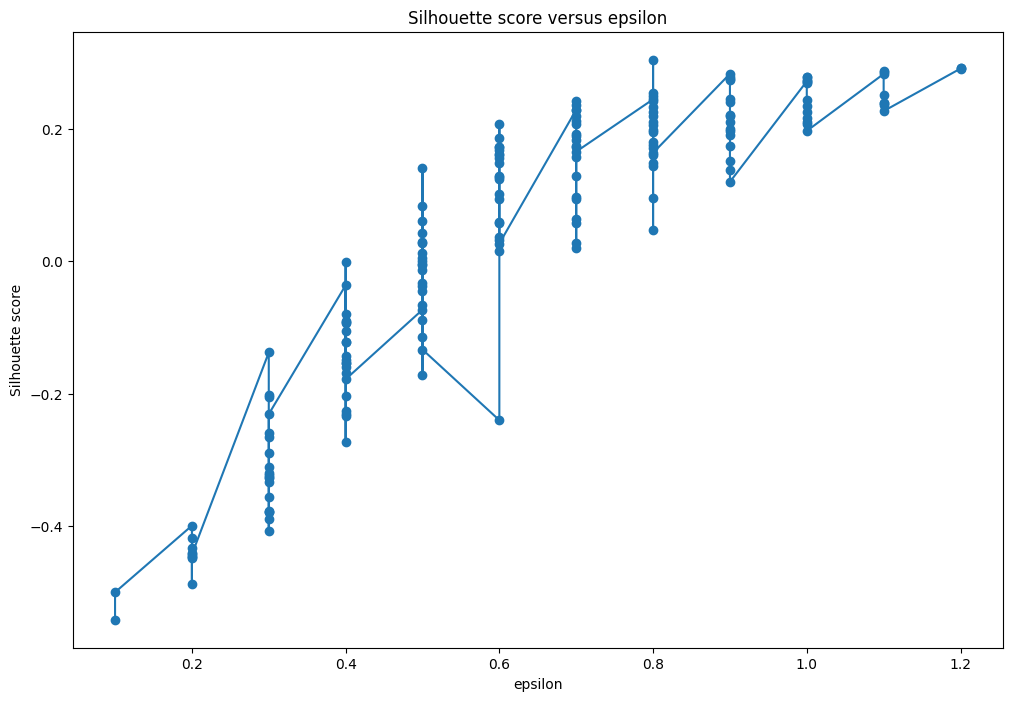

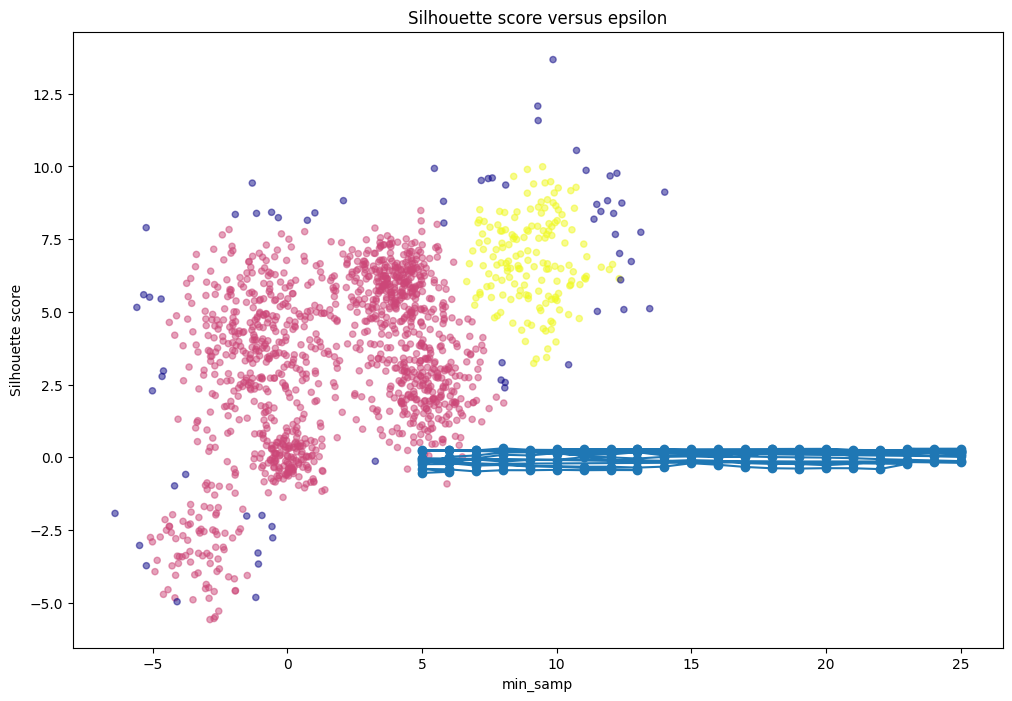

In [10]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN

from sklearn import metrics

from sklearn.metrics import silhouette_score

%matplotlib inline

def display_cluster(X,km=[]):
    plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:,1], c = km.labels_, cmap= "plasma",alpha = 0.5,s = 20)
            
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
score=[]
epsilon=[]
clusters=[]
min_samp=[]

for e in np.arange(0.1, 3.1, 0.1):
    for mini in range(5,26):
        dbscan = DBSCAN(eps =e, min_samples = mini).fit(Multi_blob_Data)
        
        Number_of_clusters=len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
        if Number_of_clusters > 1:
            epsilon.append(e)
            clusters.append(Number_of_clusters)
            min_samp.append(mini)
            score.append(metrics.silhouette_score(Multi_blob_Data, dbscan.labels_))
            
plt.figure(1)  
plt.rcParams['figure.figsize'] = [12, 8]     
plt.plot(epsilon, score, marker='o')
plt.title('Silhouette score versus epsilon')
plt.xlabel('epsilon')
plt.ylabel('Silhouette score')

plt.figure(2)       
plt.plot(min_samp, score, marker='o')
plt.title('Silhouette score versus epsilon')
plt.xlabel('min_samp')
plt.ylabel('Silhouette score')


best_score=max(score)
g=score.index(best_score)
display_cluster(Multi_blob_Data,DBSCAN(eps =epsilon[g], min_samples = min_samp[g]).fit(Multi_blob_Data))
Best_score_parameters='Epsilon = '+str(epsilon[g])+' Min_samples = '+str(min_samp[g])

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)

Best K = 2 score= 0.6810461692117462


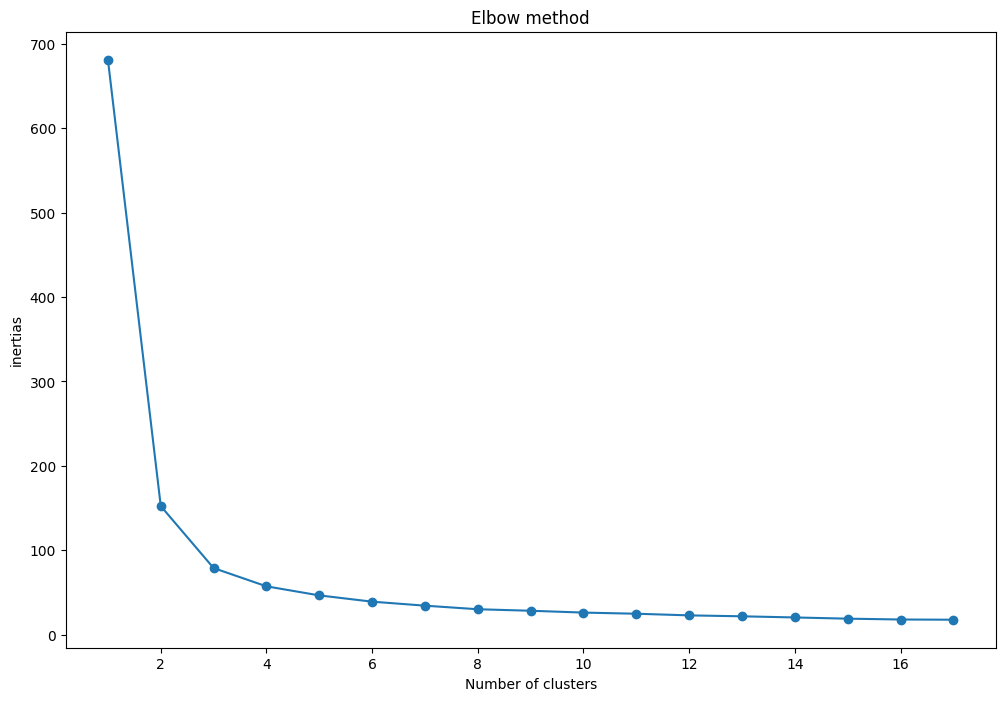

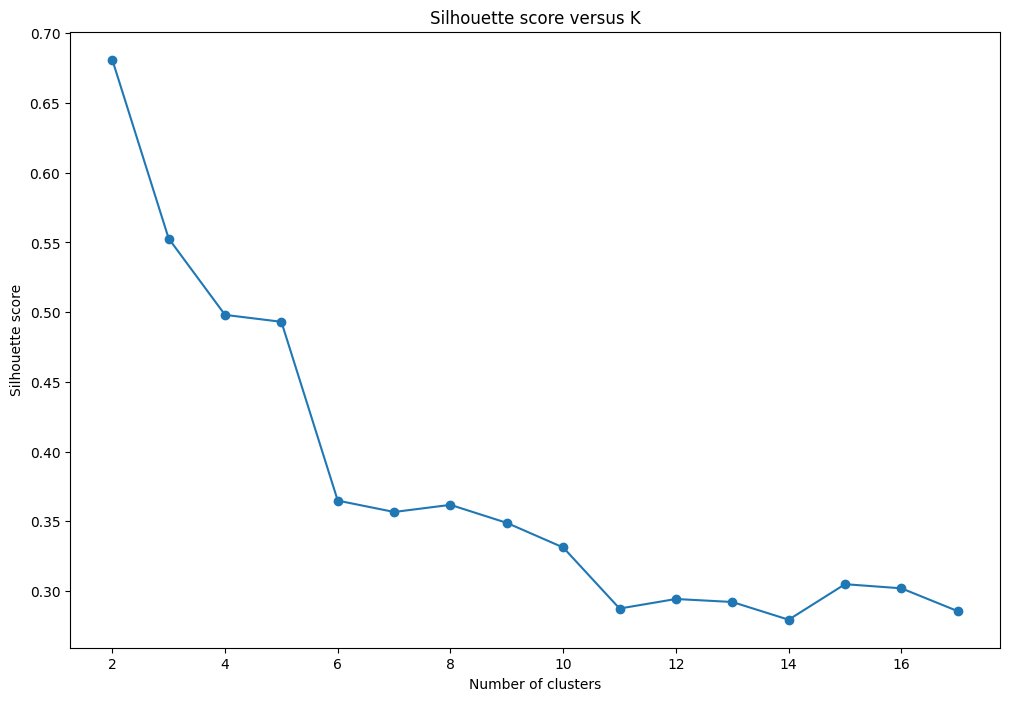

<Figure size 1200x800 with 0 Axes>

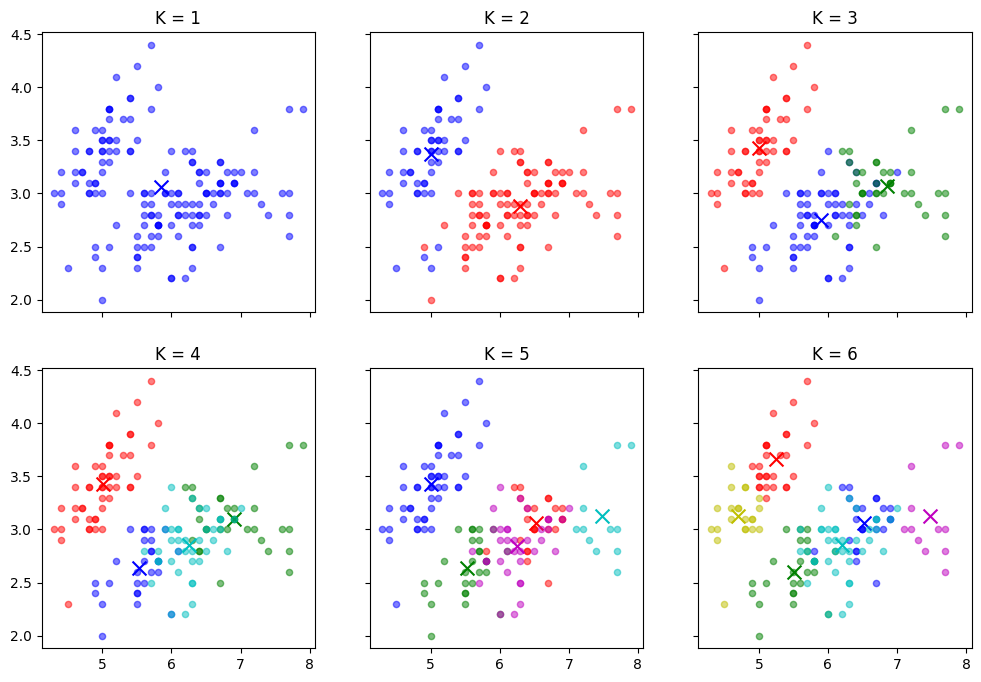

In [17]:

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import load_iris
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline


iris_data=load_iris()   #loading iris dataset from sklearn.datasets
x=iris_data.data
iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names) #creating dataframe


def display_cluster(axes,k,z,X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            axes[k][z].scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            axes[k][z].scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)
            axes[k][z].title.set_text('K = '+str(i+1))
            plt.rcParams['figure.figsize'] = [12, 8]

kmeans=[]
inertias=[]
score=[]

k=0
z=0

for j in range(1,18):
    
    kmeans.append(KMeans(n_clusters=j,init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0))
    kmeans[j-1].fit_predict(x)
    inertias.append(kmeans[j-1].inertia_)
    if(j>1 and j<18):
        score.append(silhouette_score(x, kmeans[j-1].labels_, metric='euclidean'))
        
Best_score=max(score)
K_of_Best_score=2+score.index(Best_score)

plt.figure(1)       
plt.plot(range(1,18), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertias')

plt.figure(2)       
plt.plot(range(2,18), score, marker='o')
plt.title('Silhouette score versus K')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

f = plt.figure(3)    
f, axes = plt.subplots(nrows = 2, ncols = 3, sharex=True, sharey = True)
plt.rcParams['figure.figsize'] = [12, 8]

for j in range(1,7):
    
    display_cluster(axes,k,z,x,kmeans[j-1],num_clusters=j)
    
    if j == 3:
        k=k+1
        z=0
    else:
        z=z+1
        

print('Best K = '+str(K_of_Best_score)+' score= '+str(Best_score))

cosine average clusters=2 score= 0.9581279477970689


<Figure size 1200x800 with 0 Axes>

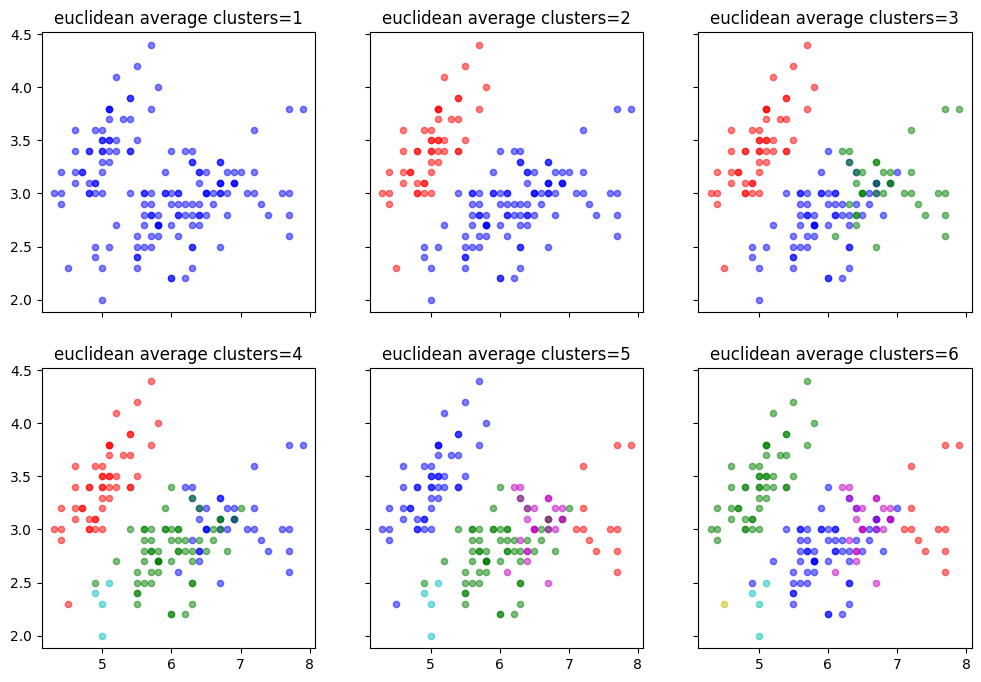

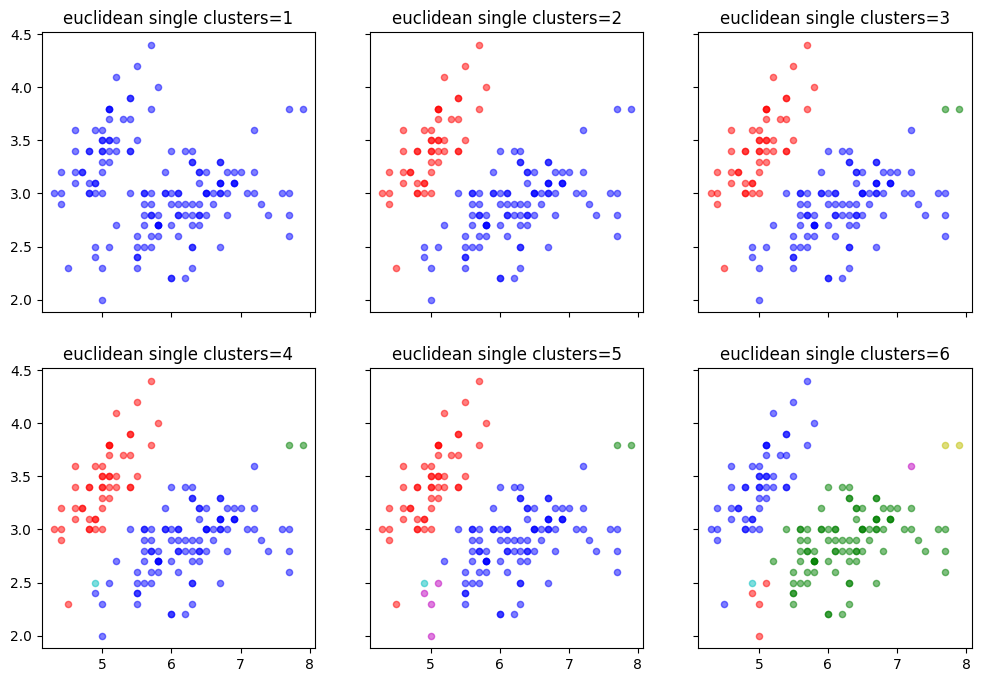

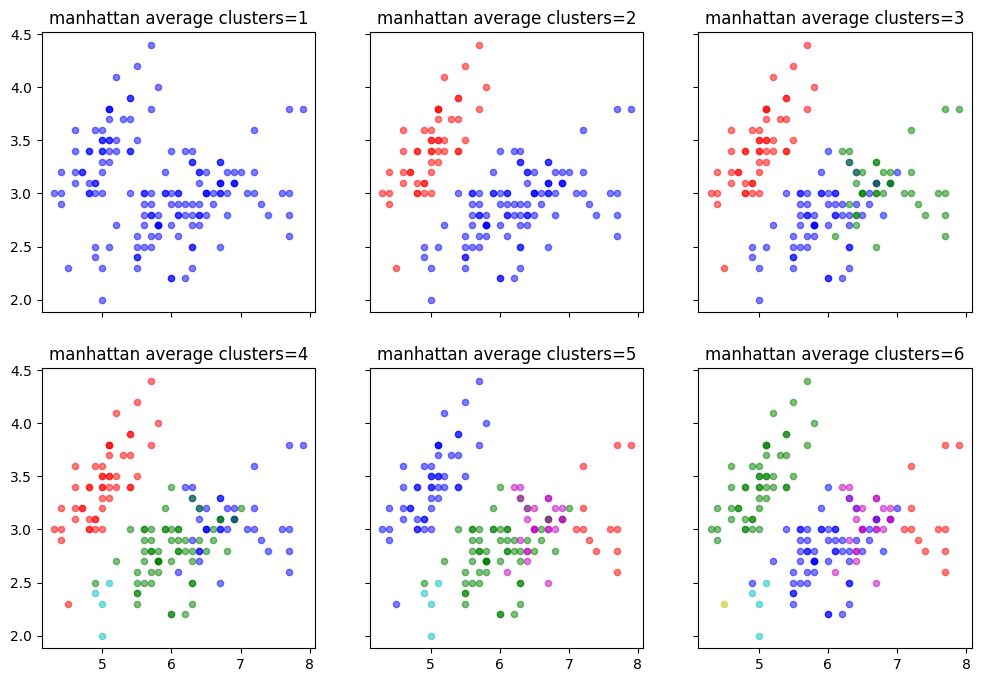

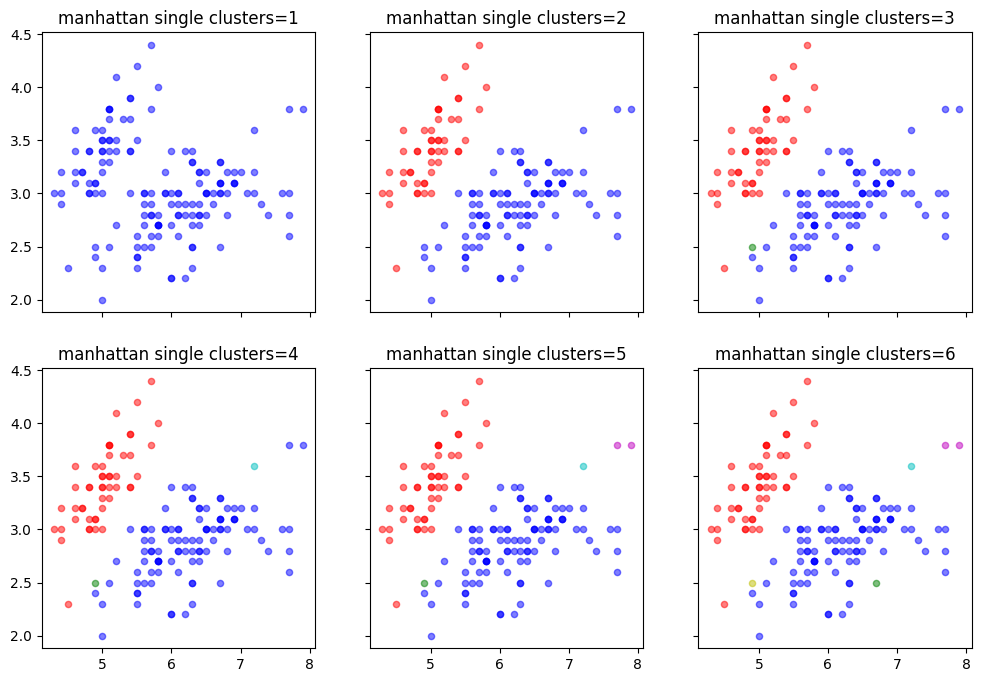

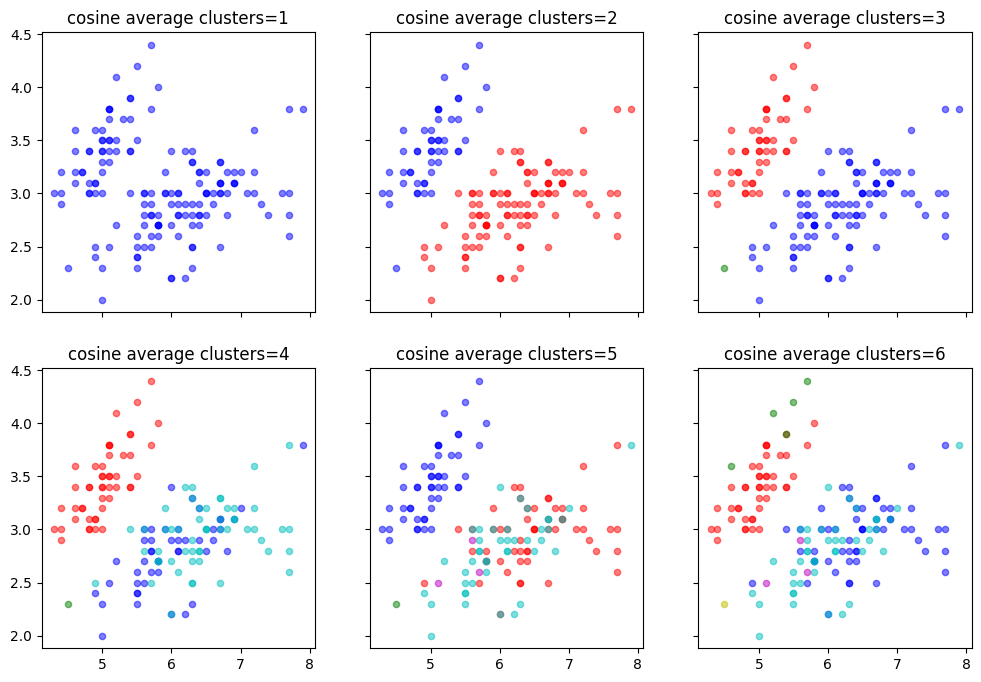

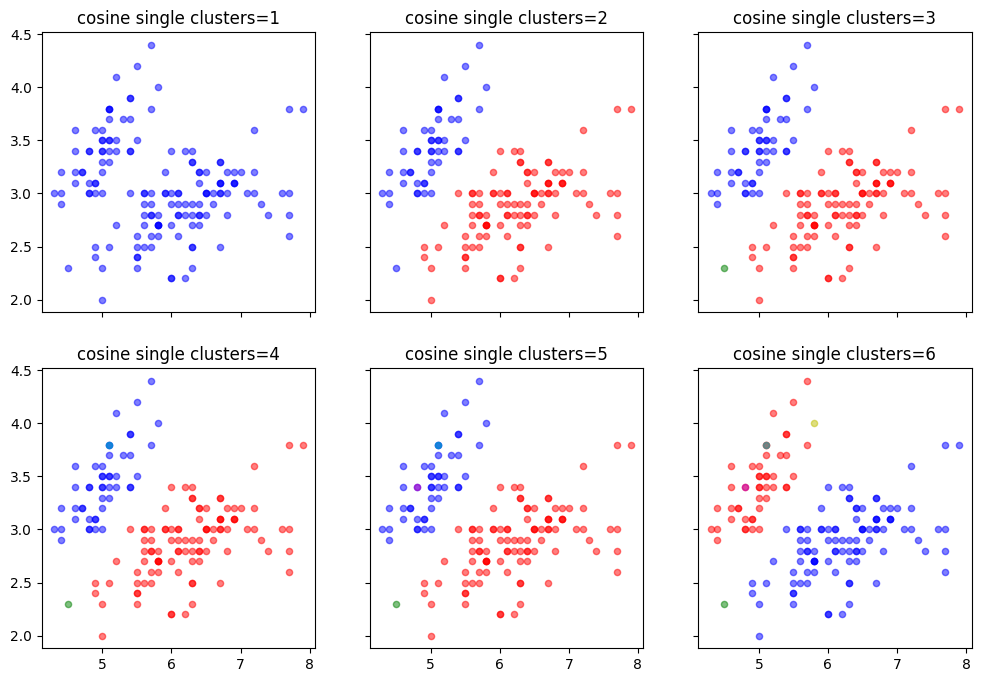

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

from sklearn.datasets import make_blobs

# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(axes,k,z,parameter,X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            axes[k][z].scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            axes[k][z].title.set_text(parameter)
            plt.rcParams['figure.figsize'] = [12, 8]
            

iris_data=load_iris()   #loading iris dataset from sklearn.datasets
x=iris_data.data
iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names) #creating dataframe

hc=[]
score=[]
parameters=[]
score_parameters=[]
j=0
t=0
for aff in ['euclidean','manhattan','cosine']:
    for link in ['average','single']:
        z=0
        k=0
        j=j+1
        f = plt.figure(j)    
        f, axes = plt.subplots(nrows = 2, ncols = 3, sharex=True, sharey = True)
        for i in range(1,7):
            parameters.append(aff+' '+link+' '+'clusters='+str(i))
            hc.append(AgglomerativeClustering(n_clusters=i,affinity=aff,linkage=link))
            hc[t].fit_predict(x)
            display_cluster(axes,k,z,parameters[len(parameters)-1],x,hc[t],num_clusters=i)
            
            if(i>1):
                score.append(silhouette_score(x, hc[t].labels_, metric=aff))
                score_parameters.append(parameters[len(parameters)-1])
            
            t=t+1
            
            if i == 3:
                k=k+1
                z=0
            else:
                z=z+1
Best_score=max(score)

Best_score_parameter=score_parameters[score.index(Best_score)]
print(Best_score_parameter+' score= '+str(Best_score))

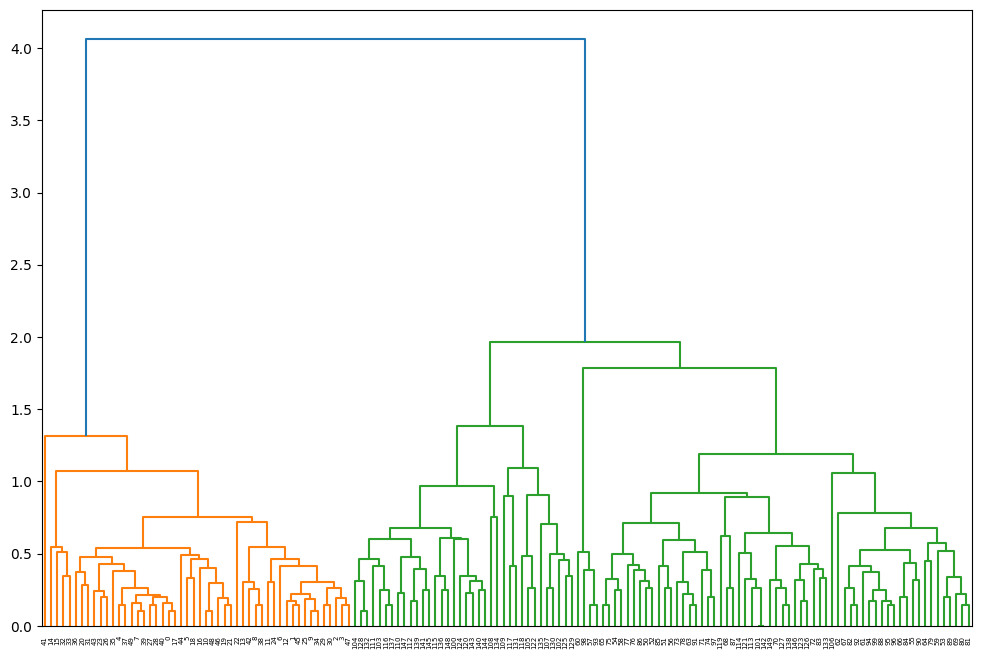

In [20]:
dendrogram_av = shc.dendrogram(shc.linkage( x, method='average'))
plt.rcParams['figure.figsize'] = [12, 8]

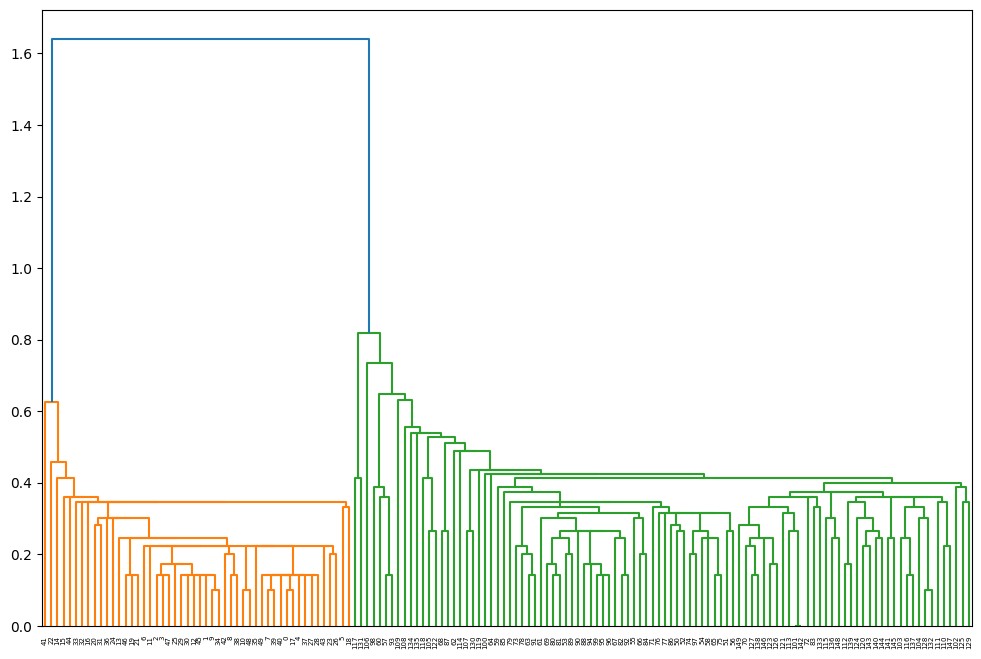

In [19]:
dendrogram_si = shc.dendrogram(shc.linkage( x, method='single'))
plt.rcParams['figure.figsize'] = [12, 8]

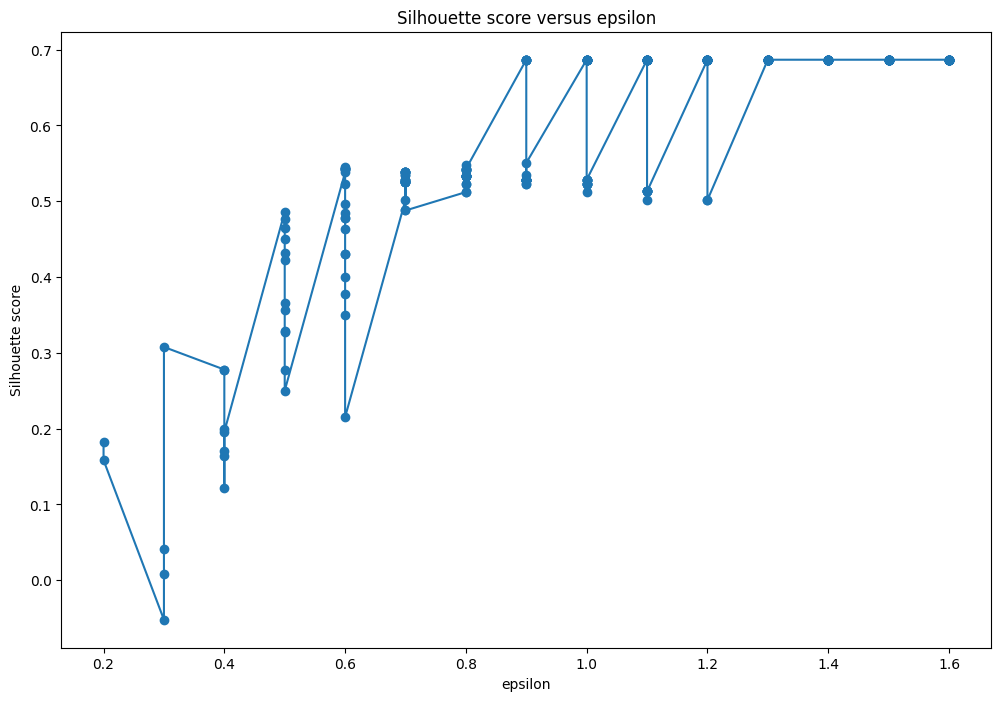

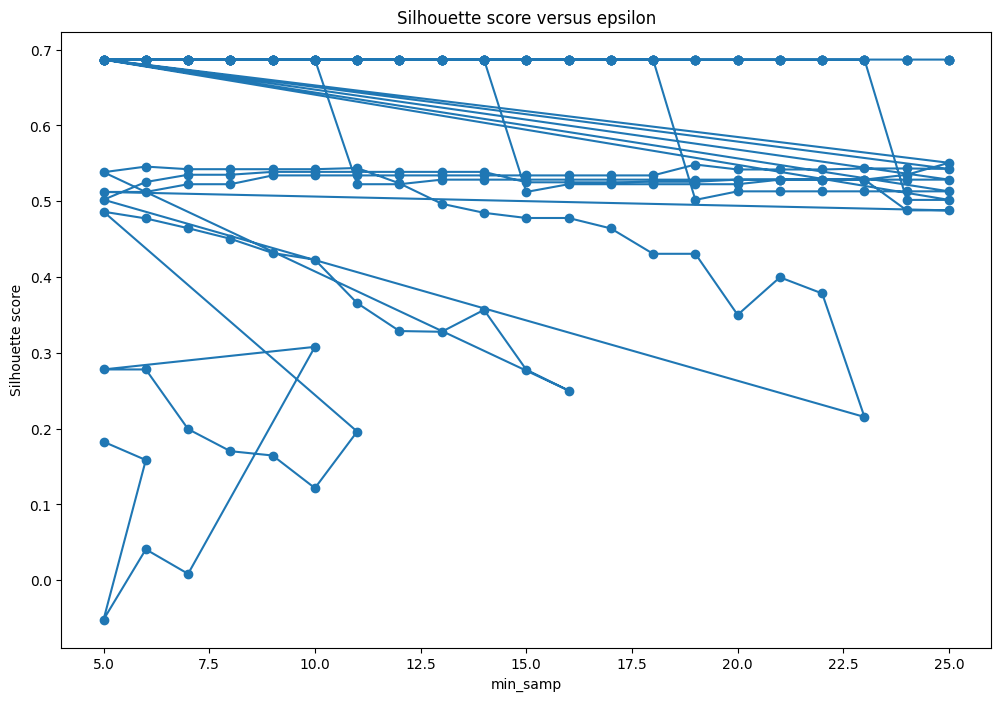

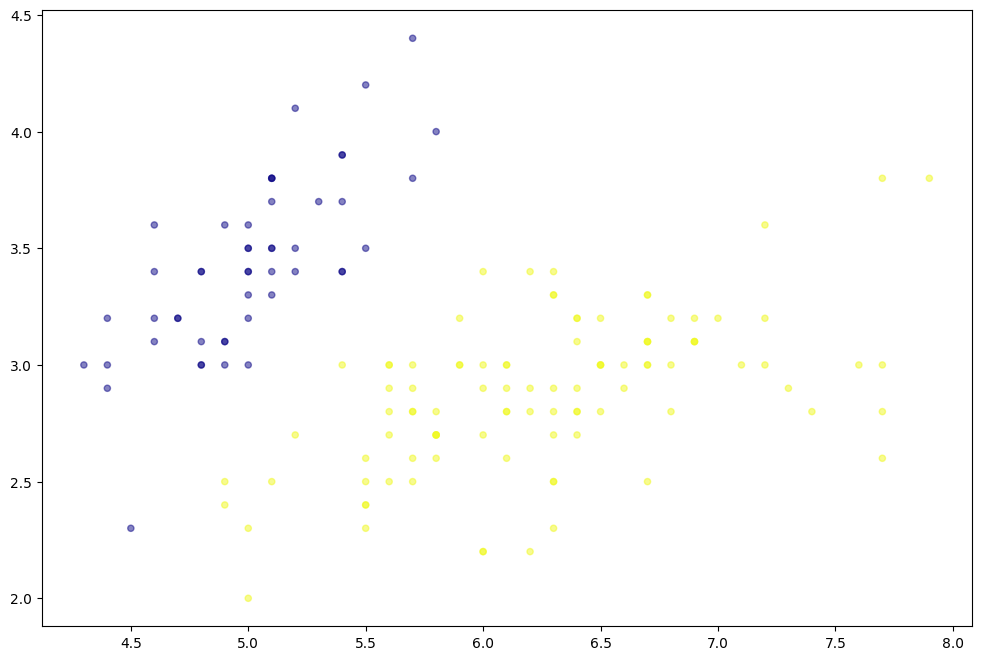

In [23]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN

from sklearn import metrics

from sklearn.metrics import silhouette_score

%matplotlib inline

def display_cluster(X,km=[]):
    plt.scatter(x[:, 0], x[:,1], c = km.labels_, cmap= "plasma",alpha = 0.5,s = 20)
            
iris_data=load_iris()   #loading iris dataset from sklearn.datasets
x=iris_data.data
iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names) #creating dataframe

score=[]
epsilon=[]
clusters=[]
min_samp=[]

for e in np.arange(0.1, 3.1, 0.1):
    for mini in range(5,26):
        dbscan = DBSCAN(eps =e, min_samples = mini).fit(x)
        
        Number_of_clusters=len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
        if Number_of_clusters > 1:
            epsilon.append(e)
            clusters.append(Number_of_clusters)
            min_samp.append(mini)
            score.append(metrics.silhouette_score(x, dbscan.labels_))
            
plt.figure(1)  
plt.rcParams['figure.figsize'] = [12, 8]     
plt.plot(epsilon, score, marker='o')
plt.title('Silhouette score versus epsilon')
plt.xlabel('epsilon')
plt.ylabel('Silhouette score')

plt.figure(2)       
plt.plot(min_samp, score, marker='o')
plt.title('Silhouette score versus epsilon')
plt.xlabel('min_samp')
plt.ylabel('Silhouette score')

plt.figure(3) 

best_score=max(score)
g=score.index(best_score)
display_cluster(x,DBSCAN(eps =epsilon[g], min_samples = min_samp[g]).fit(x))
Best_score_parameters='Epsilon = '+str(epsilon[g])+' Min_samples = '+str(min_samp[g])

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 